<a href="https://colab.research.google.com/github/va4756/big_RaeJung/blob/main/bigdata_RaeJung_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 107_의사결정나무

In [2]:
!git clone https://github.com/leeraejung/RaejungLecture-MachineLearning.git

Cloning into 'RaejungLecture-MachineLearning'...
remote: Enumerating objects: 711, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 711 (delta 0), reused 5 (delta 0), pack-reused 703 (from 1)
Receiving objects: 100% (711/711), 50.53 MiB | 9.58 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (692/692), done.


In [3]:
!pip install numpy matplotlib scikit-learn pandas
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.6 MB/s eta 0:00:00


In [4]:
import logging
import matplotlib.pyplot as plt

# 로그 레벨 설정
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## 1.Decision Tree

### (Gini Index), (Entroy Index), (Information Gain)

In [5]:
mglearn.plots.plot_animal_tree()

### 1.1 결정 트리 만들기

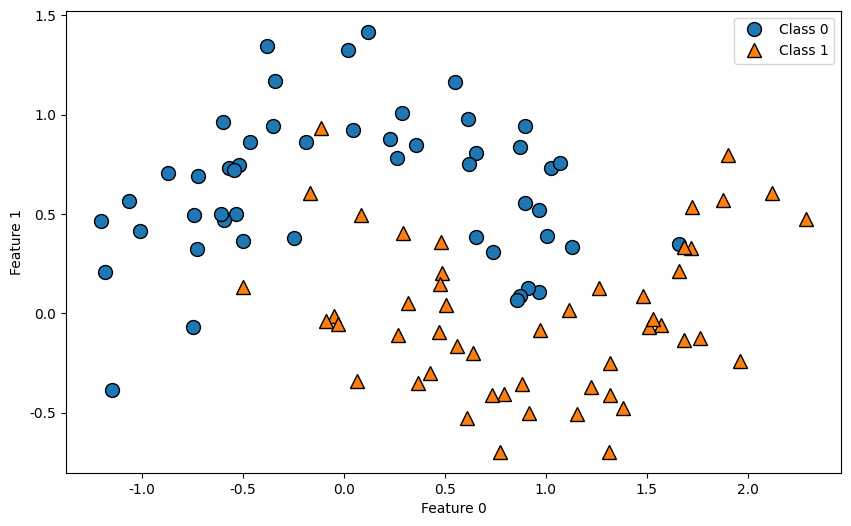

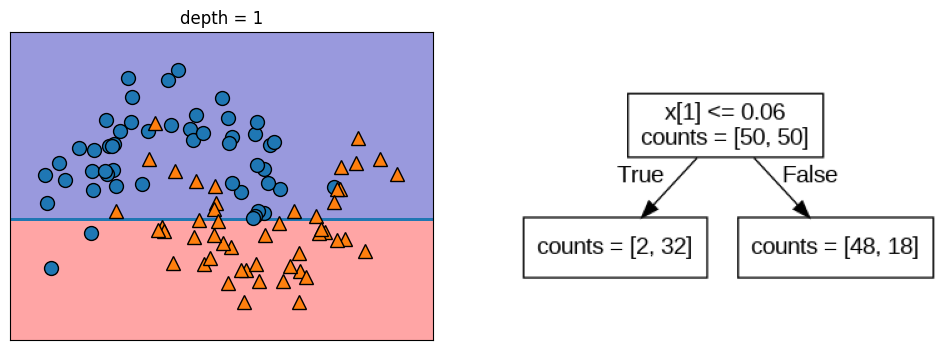

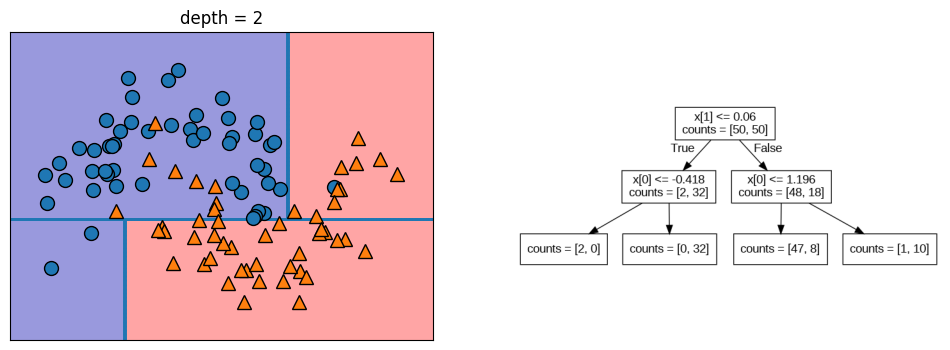

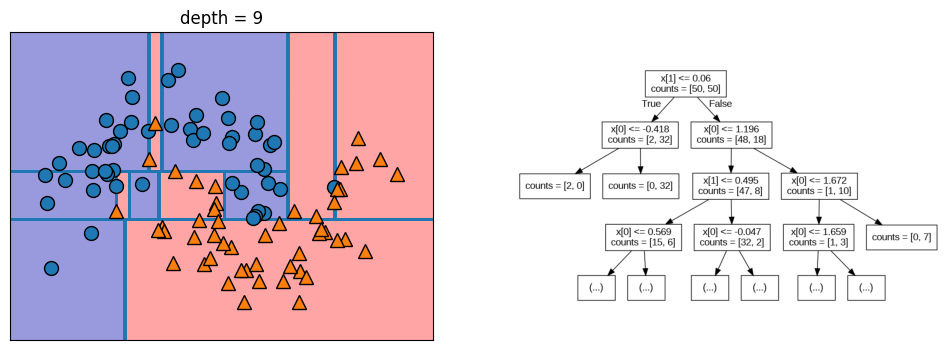

In [6]:
# 데이터 셋 - two_moons
mglearn.plots.plot_tree_progressive()

### 1.2 결정 트리 복잡도 제어 - Overfitting 방지

#### 1.2.1 max_depth 조절

In [7]:
# 데이터 로딩 및 데이터 분할
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target,
                                                     random_state=123)

In [8]:
# 결정 트리 적용
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.923


In [9]:
# max_depth 조절
tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.981
테스트 세트 정확도: 0.923


#### 1.2.2 min_samples_leaf 조절